# Dimension Reduction and Matrix Factorization<a class="tocSkip">

## Dimensionality and Features of Data

- Suppose data matrix has one row per observation

- One column per attribute, feature, etc.

- Each attribute (hopefully) provide additional information  
    Consider the following:

<table>
<tr style="text-align:center;background:white">
    <th style="text-align:center">Data 1</th>
    <th></th>
    <th style="text-align:center">Data 2</th>
</tr>
<tr>
<td>
        
**Age (days)**|**Height (in)**
:-----:|:-----:
182|28
399|30
725|33

</td>
<td></td>
<td>
        
**Age (days)**|**Height (in)**|**Height (ft)**
:-----:|:-----:|:-----:
182|28|2.33
399|30|2.5
725|33|2.75

</td></tr> </table>

- Two height columns are adding the same information

- Number of attributes is often referred to as dimensionality of a dataset

- Number of attributes = number of columns

- Dimensions = rank of matrix

- Each attribute (hopefully) provide additional information  
    Consider the following:

<table>
<tr style="text-align:center;background:white">
    <th style="text-align:center">Data 1</th>
    <th></th>
    <th style="text-align:center">Data 2</th>
</tr>
<tr>
<td>
        
**Age (days)**|**Height (in)**
:-----:|:-----:
182|28
399|30
725|33

</td>
<td></td>
<td>
        
**Age (days)**|**Height (in)**|**Height (ft)**
:-----:|:-----:|:-----:
182|28|2.33
399|30|2.5
725|33|2.75

</td></tr>
<tr style="text-align:center;background:white">
    <th style="text-align:center">2 dimensional (rank=2)</th>
    <th></th>
    <th style="text-align:center">Still 2 dimensional (rank=2)</th>
</tr>
</table>

## Dimensionality and Rank

- Rank of a matrix $\approx$ dimensionality of dataset

- Many features does not mean data is rich:
    there may be redundant information

- Matrices could be low-rank (not much information): e.g. $R = uv^T$
    $$
    \begin{array}{|l|l|l|l|}\hline 
            & m_1 & m_2 & m_3 \\ \hline 
        u_1 & 1 & 0 & 2 \\ \hline 
        u_2 & 2 & 0 & 4 \\ \hline 
        u_3 & 3 & 0 & 6 \\ \hline 
    \end{array}
    = R = uv^T =
    \begin{array}{|l|l|}\hline 
        u_1 & 1  \\ \hline 
        u_2 & 2  \\ \hline 
        u_3 & 3  \\ \hline 
    \end{array}
    \begin{array}{|l|l|l|}\hline 
            m_1 & m_2 & m_3 \\ \hline 
            1 & 0 & 2 \\ \hline 
    \end{array}
    $$

- Large matrix does not mean rank is high: there may be linearly dependency

- Linear dependency on other features:  
    Some columns maybe linear combination of others

## Linear dependence and Redundant information

- Linear combination of vectors:  
$$
\frac{1}{10} \cdot \left[ \begin{array}{l}{2} \\ {3} \\ {4}\end{array}\right]+2 \cdot \left[ \begin{array}{l}{5} \\ {7} \\ {9}\end{array}\right]=\left[ \begin{array}{l}{10.2} \\ {14.3} \\ {18.4}\end{array}\right]
$$

- A matrix (mxn) times a column (nx1) gives  
    one linear combination of the columns of the matrix.

- A matrix (mxn) times a matrix (nxk) has k columns that are  
    each a matrix (mxn) times a column (nx1)

## Matrix Multiplication: $C = A\cdot B$
|                               |                                |
|------------------------------ | ------------------------------ |
|![matmul1](images/matmul1.png) | ![matmul1](images/matmul2.png) |
|$$ C_{ij}=A_{i-}^TB_{-j}=\sum_{k=1}^K A_{ik}B_{kj} $$ |$$ C=\sum_{k=1}^K A_{-k}B_{k-} $$ |
|![matmul3](images/matmul3.png) | ![matmul4](images/matmul4.png) |
|$$ C_{i-}=A_{i-}B $$           |$$C_{-j} = AB_{-j}$$            |

- Two height data columns are linear combination of each other

$$
\begin{array}{|c|c|}\hline \text { Age (days) } & {\text { Height (in) }} \\ \hline 182 & {28} \\ \hline 399 & {30} \\ \hline 725 & {33} \\ \hline\end{array}
\times
\begin{array}{|l|l|l|}\hline 1 & {0} & {0} \\ \hline 0 & {1} & {1 / 12} \\ \hline\end{array}
=
\begin{array}{|c|c|c|}\hline \text { Age (days) } & {\text { Height (in) }} & {\text { Height }(\mathrm{ft})} \\ \hline 182 & {28} & {2.33} \\ \hline 399 & {30} & {2.5} \\ \hline 725 & {33} & {2.75} \\ \hline\end{array}
$$

$$
\small
\begin{array}{|l|l|}\hline \text { width } & {\text { length }} & {\text { area }} \\ \hline 20 & {20} & {400} \\ \hline 16 & {12} & {192} \\ \hline 24 & {12} & {288} \\ \hline 25 & {24} & {600} \\ \hline\end{array}
\times
\begin{array}{|c|c|c|c|}\hline 1 & {0} & {0} & {2} \\ \hline 0 & {1} & {0} & {2} \\ \hline 0 & {0} & {1} & {0} \\ \hline\end{array}
=
\begin{array}{|l|l|l|}\hline \text { width } & {\text { length }} & {\text { area }} & {\text { perimeter }} \\ \hline 20 & {20} & {400} & {80} \\ \hline 16 & {12} & {192} & {60} \\ \hline 24 & {12} & {288} & {72} \\ \hline\end{array}
$$

- What if columns are not *perfect* linear combinations?

- Columns may be *approximately* a linear combination of others (numerical rank)

## Recommender Systems

### User-Oriented Recommender System

![](images/recommender-user-oriented.png)
[source](https://ieeexplore.ieee.org/document/5197422)

### Latent Factor approach for Recommender System

![](images/recommender-latent-factor.png)
[source](https://ieeexplore.ieee.org/document/5197422)


#### Latent Factor Representation

![](images/movie-latent-factors.png)
[source](https://ucsb-primo.hosted.exlibrisgroup.com/permalink/f/1egv95m/01UCSB_ALMA51268902820003776)

- Ratings is a combination of user and movie characteristics:  
    $$\begin{aligned} r_{i j} & \approx \sum_{s=1}^{k} u_{i s} \cdot v_{j s} \\ &=\sum_{s=1}^{k}(\text { Affinity of user $i$ to characteristic }s) \times(\text {Affinity of movie } j \text { to characteristic} s) \end{aligned}$$
   

 
- For User $i$'s rating of Movie $j$,  
    $$
    \begin{aligned} r_{i j} \approx &(\text {Affinity of user $i$ to history}) \times(\text {Affinity of item } j \text { to history}) \\ &+(\text {Affinity of user $i$ to romance)} \times(\text {Affinity of item } j\text { to romance) } \end{aligned}
    $$

#### Latent Factor Representation?

- $R$ is _approximately_ low rank: i.e. $U$ ($I$ users-by-$k$ characteristics) and $V$ ($J$ movies-by-$k$ characteristics) are rank-2 matrices ($k=2$)
    $$ R\approx UV^T, $$  

- Find $U$ and $V$ to minimize matrix norm of residual matrix: e.g.,
    $$ \min_{U,V} \|R - UV^T\|_F = \min_{U,V} \sum_{i,j} (r_{ij} - U_{i\cdot} V_{\cdot j}^T)^2$$
 

## Residuals

| Ratings | Residual |
|---|---|
| ![](images/latent-factor-ratings.png) | ![](images/latent-factor-residual.png) |

## Linear Independence and Unique information

- If two vectors are orthogonal, they cannot be used to describe each other

- If two vectors are orthogonal, one is *not* a linear combination of the other

- Orthogonal matrix $Q$: all columns are linearly independent from each other

- If $Q$ is also orthnormal, $Q$ is orthogonal and each column has norm equal to 1

- Since $Q$ is orthonormal, 
$$ QQ^T = Q^TQ = I $$

## Matrix Decompositions: Principal Components Analysis

**Principal components analysis** (PCA) consists in _**finding a linear transformation of one's data that captures covariation**_.

$X$: Data matrix of size $\mathbb{R}^{n\times p} (standardized)$

- Principal Components Analysis (PCA): $ Y =  XQ $: The transformation maps a data vector $x_i$ from an original space of $p$ variables to a new space of r $(r<p)$ variables which are uncorrelated over the dataset.
    
    + $Q$: Orthonormal rotation matrix (loadings)
    + $Y$: Rotated data matrix (score)

- Rotation matrix $Q$ is computed to transform data $X$

- First columns of $Y$ contain a larger proportion of _information_

- PCA can be described in terms of SVD factors

## Time Series Decompositions: Fourier Transform


- Similar idea: Fourier transform of time series signal
    "Unique" information: sinusoidal basis functions  
    Coefficients: contribution of each basis function  
    ![fft](images/fft.png)

![fft-gif](images/fft.gif)

## Matrix Decompositions: Independent Components Analysis

![blind-source](images/blind-source-separation.png)

$X$: Data matrix of size $\mathbb{R}^{n\times p}$

- Independent Components Analysis (ICA): $ X = W Y $  
    - $W$: independent components
    - $Y$: mixing coefficients

- Independent components matrix $W$ (hopefully) represents underlying signals

- Matrix $Y$ contain mixing coefficients

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import pandas as pd

from sklearn.decomposition import FastICA, PCA

sns.set(rc={"figure.figsize":(10, 7)})

## Adapted from scikit-learn ICA example

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

In [4]:
s1 = np.sin(2 * time)                   # Signal 1: sinusoidal signal
s2 = np.sign(np.sin(3 * time))          # Signal 2: square signal
s3 = signal.sawtooth(4 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S

array([[ 0.35281047,  0.08003144, -0.8042524 ],
       [ 0.45618256,  1.3735116 , -1.17944757],
       [ 0.206025  ,  0.96972856, -0.98862776],
       ...,
       [-0.2747797 , -0.73104792,  0.80168551],
       [-0.36182343, -1.26616078,  1.05451172],
       [-0.39548027, -0.92131111, -0.94269635]])

In [5]:
S /= S.std(axis=0)  # Standardize data
Sdf = pd.DataFrame(S, columns=["sinusoid", "square", "sawtooth"])
Sdf.head()

,sinusoid,square,sawtooth
0,0.495126,0.078411,-1.315931
1,0.640196,1.345703,-1.929831
2,0.289131,0.950095,-1.617609
3,0.148940,1.007979,-1.081737
4,0.258527,1.003596,-1.386195


In [22]:
Sdf = Sdf.reset_index().melt(id_vars='index')
Sdf.head()

,index,variable,value
0,0,sinusoid,0.495126
1,1,sinusoid,0.640196
2,2,sinusoid,0.289131
3,3,sinusoid,0.148940
4,4,sinusoid,0.258527


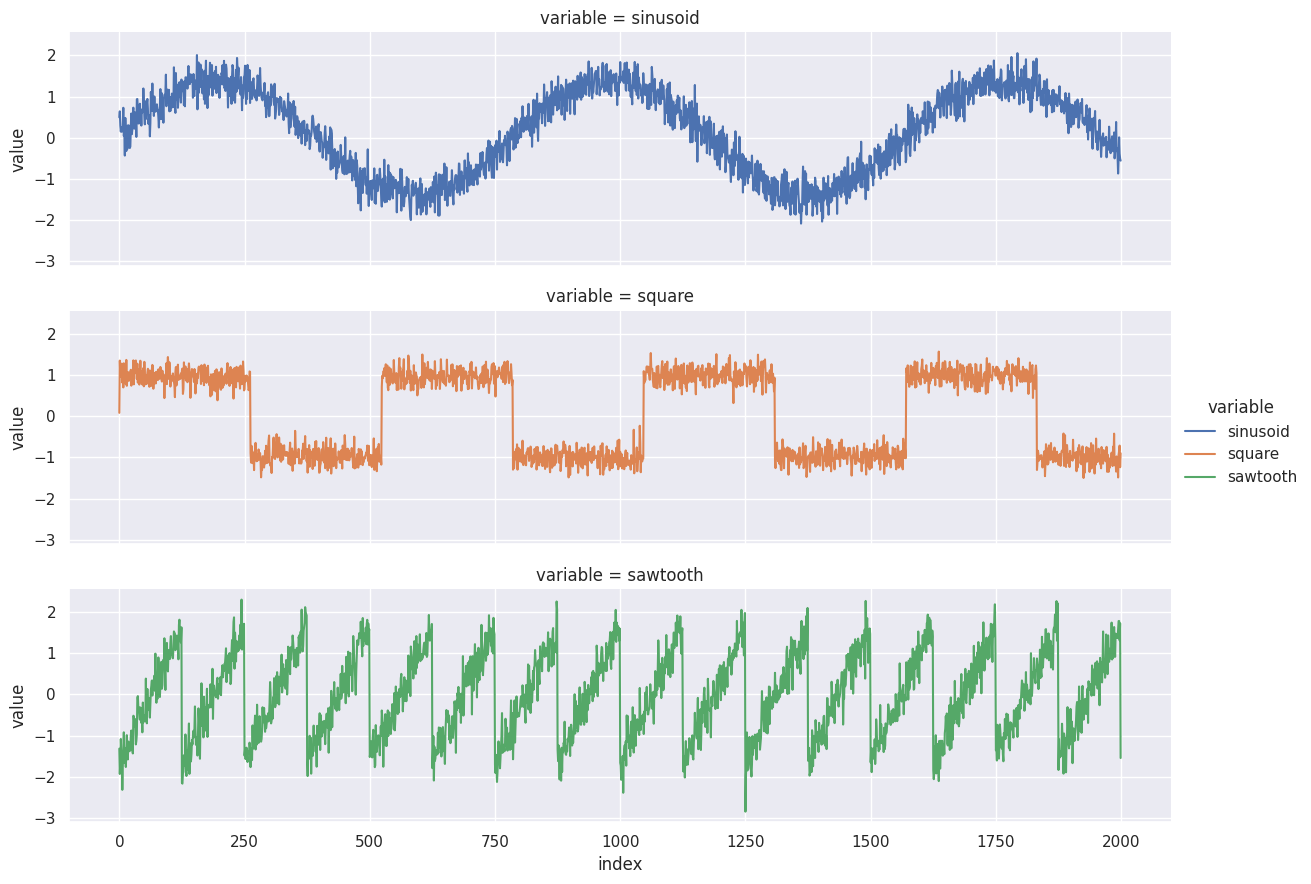

In [23]:
sns.relplot(data=Sdf, x='index', y='value', hue='variable', row='variable', kind='line', height=3, aspect=4);

In [6]:
# Mix data
A = np.array([[1, 1, 1], [0.5, -2, 1.0], [-1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations
Xdf = pd.DataFrame(X, columns=["A", "B", "C"]).reset_index().melt(id_vars='index')

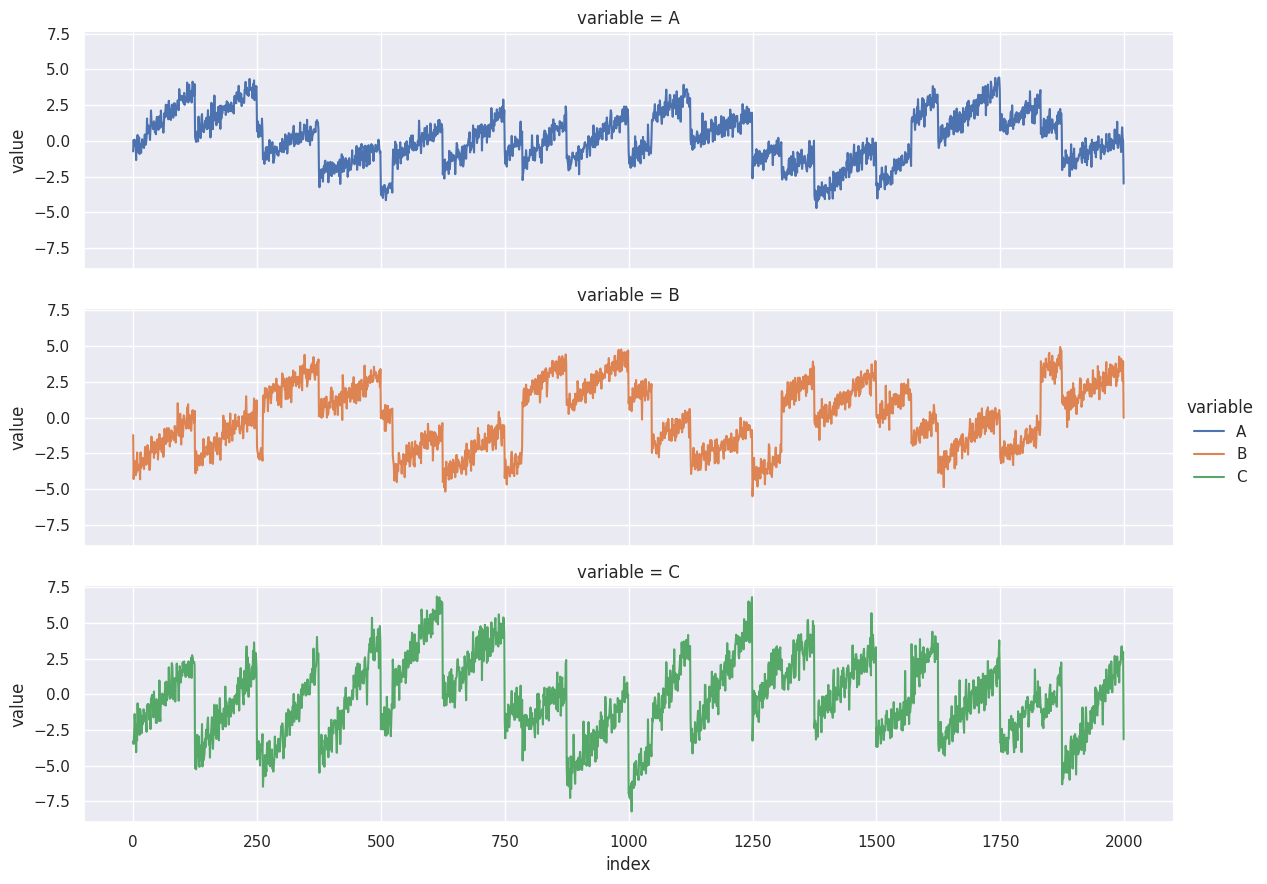

In [6]:
sns.relplot(data=Xdf, x='index', y='value', hue='variable', row='variable', kind='line', height=3, aspect=4);

In [24]:
# Singular value decomposition
U, S, V = np.linalg.svd(X, full_matrices=False)
W = U @ np.diag(S) # Matrix W: a "basis"

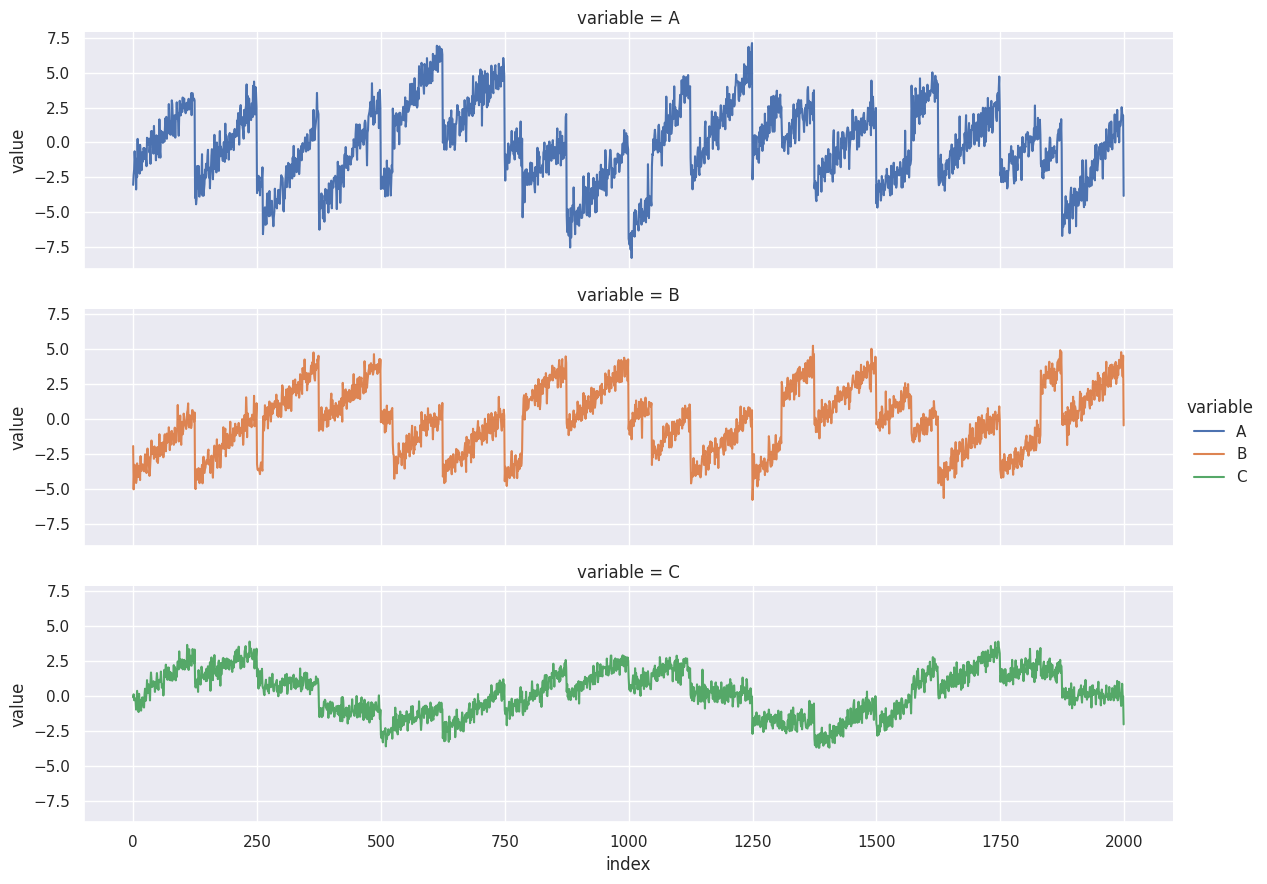

In [25]:
Wdf = pd.DataFrame(W, columns=["A", "B", "C"]).reset_index().melt(id_vars='index')
sns.relplot(data=Wdf, x='index', y='value', hue='variable', row='variable', kind='line', height=3, aspect=4);

In [ ]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

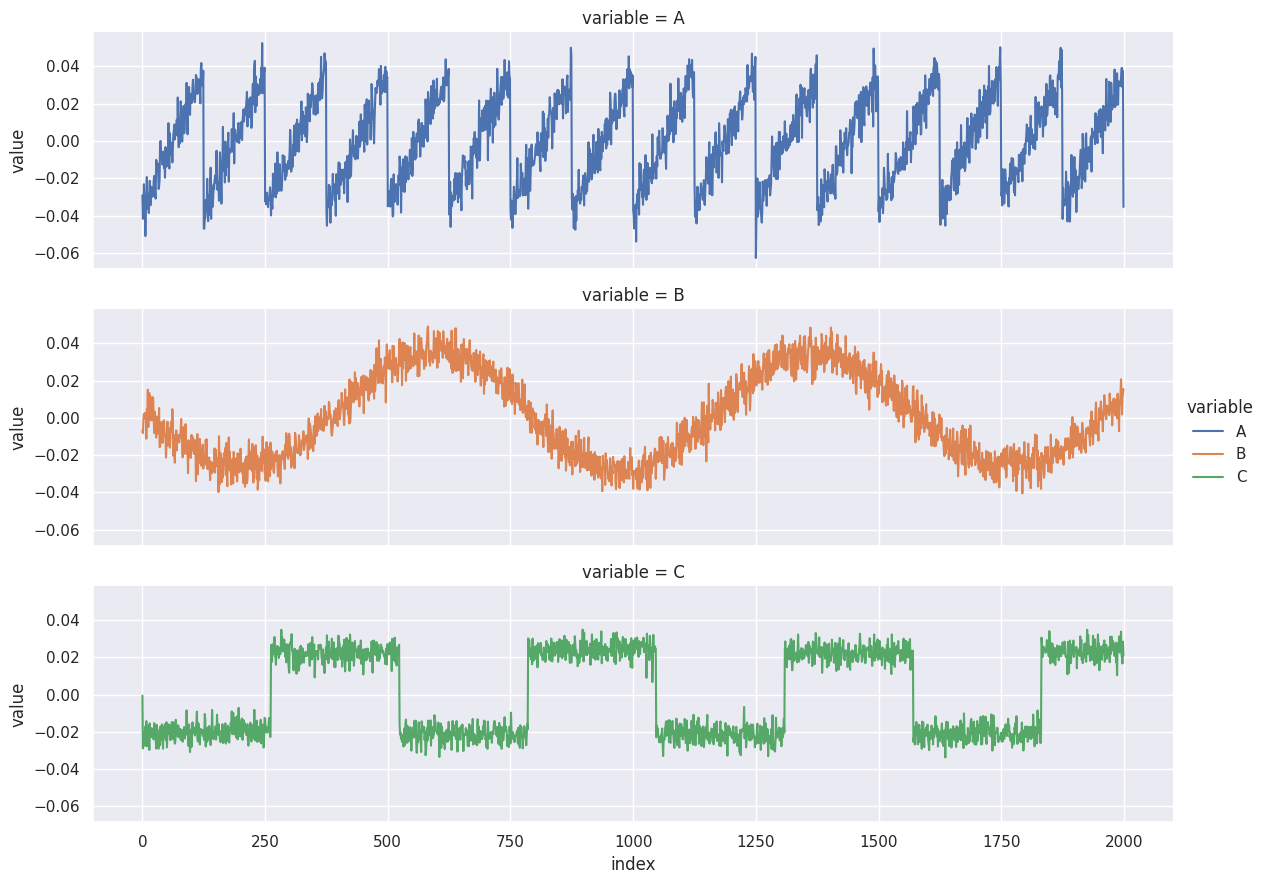

In [27]:
Sdf_ = pd.DataFrame(S_, columns=["A", "B", "C"]).reset_index().melt(id_vars='index')
sns.relplot(data=Sdf_, x='index', y='value', hue='variable', row='variable', kind='line', height=3, aspect=4);

In [28]:
# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

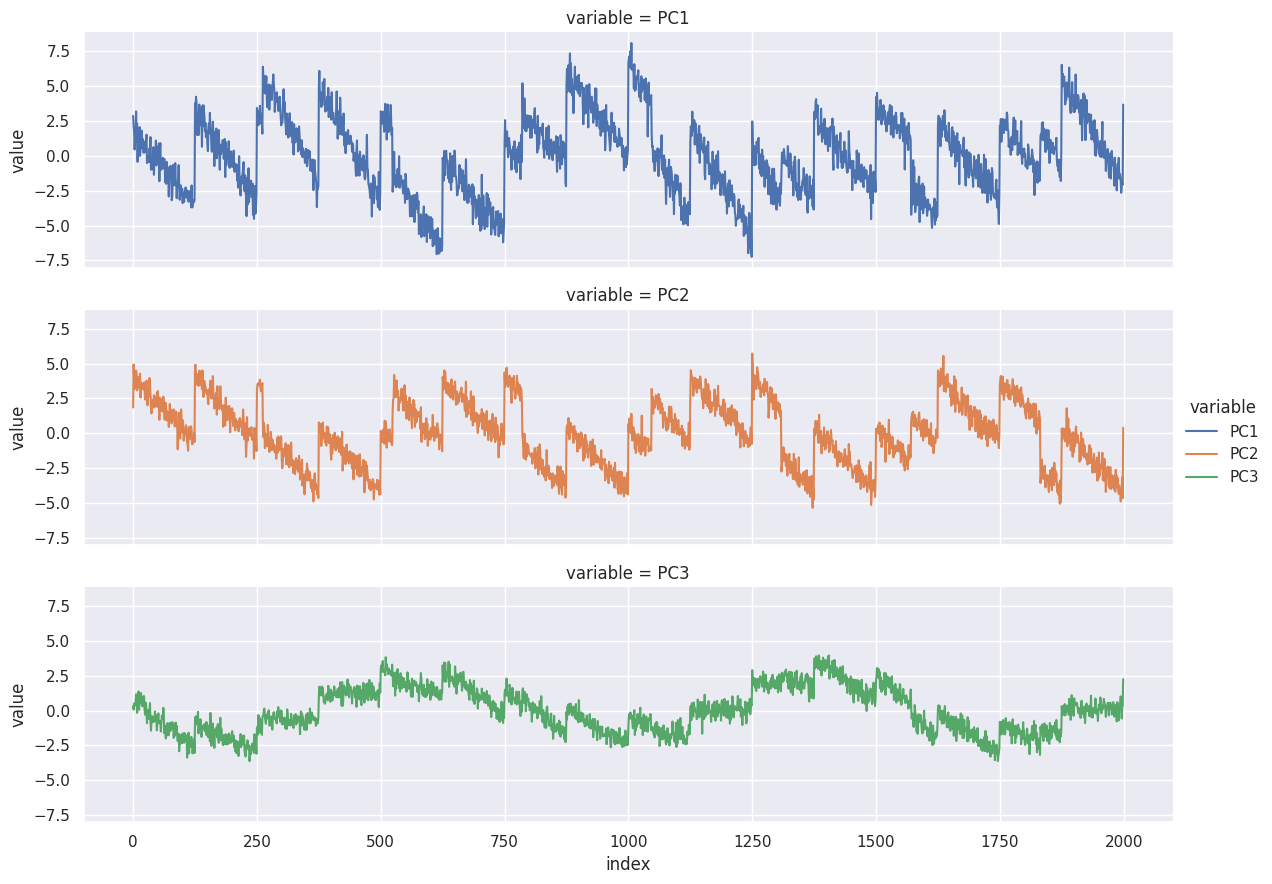

In [29]:
Hdf = pd.DataFrame(H)

Hdf = pd.DataFrame(H, columns=["PC1", "PC2", "PC3"]).reset_index().melt(id_vars='index')
sns.relplot(data=Hdf, x='index', y='value', hue='variable', row='variable', kind='line', height=3, aspect=4);

## ICA vs PCA

- PCA aligns data to new coordinate system

- PCA components are orthonormal

- ICA finds hidden signals

- ICA components (signals) may not be orthogonal

![components-view](images/components-to-data.png)

![components-view](images/ica-vs-pca.png)

## Non-negative Matrix Factorization

- Assume data $X$ is $p\times n$ matrix of non-negative values

- e.g., images, probabilities, counts, etc

- NMF computes the following factorization:  
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$  
    where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

### NMF for Image Analysis

![nmf-faces](images/nmf-faces.png)

### NMF for Hyperspectral image analysis

![nmf-hyper](images/nmf-hyper.png)


### NMF for Topic Discovery

![nmf-topics](images/nmf-topics.png)


- [More NMF examples](https://www.cs.rochester.edu/u/jliu/CSC-576/NMF-tutorial.pdf)

## Scikit-learn Functions

- [Singular Value Decomposition](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

- [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

- [Independent Component Analysis](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)  
    [Blind Source Separation](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)

- [Non-negative Matrix Factorization](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF)  
    [Topic Discovery](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html)
    [Image Analysis](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html)

- [Matrix Decompositions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

## References

- [A Tutorial on Principal Component Analysis, Jonathon Shlens](https://arxiv.org/abs/1404.1100)

- [A Tutorial on Independent Component Analysis, Jonathon Shlens](https://arxiv.org/abs/1404.2986)

- UC Berkeley's Data Science 100 lecture notes, John Denero

- [The Why and How of Nonnegative Matrix Factorization - Nicolas Gillis](https://arxiv.org/abs/1401.5226)